In [1]:
import pandas as pd

In [2]:
#import matplotlib as plt

In [3]:
import seaborn as sns

In [4]:
#ES_INDEX_DATE="2018-01-28"
ES_INDEX_DATE="2018-01-30"
ES_INDEX_DATE="2018-02-03"

DATA_FILE="../../rbcdata/%s/ldr" % ES_INDEX_DATE

#DATA_FILE="../../rbcdata/total/%s/ldr" % ES_INDEX_DATE
print DATA_FILE

../../rbcdata/2018-02-03/ldr


In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 7)

Populating the interactive namespace from numpy and matplotlib


In [6]:
data=pd.read_csv(DATA_FILE)

In [7]:
data["acc"]= np.sqrt(data['data.ax']**2 + data['data.az']**2)

In [8]:
section=75*60*60*48

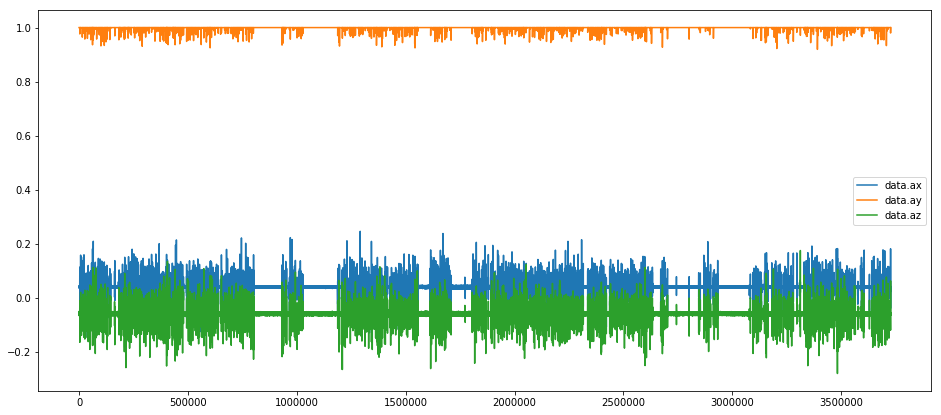

In [9]:
data.head(section)[["data.ax","data.ay","data.az"]].plot()

In [10]:
x=data[["timestamp","acc"]].head(section)
x["ts"]=pd.to_datetime(x["timestamp"])
x=x.drop(columns=["timestamp"])
x=x.set_index("ts")
x=x.tz_localize('UTC').tz_convert('Asia/Kolkata')

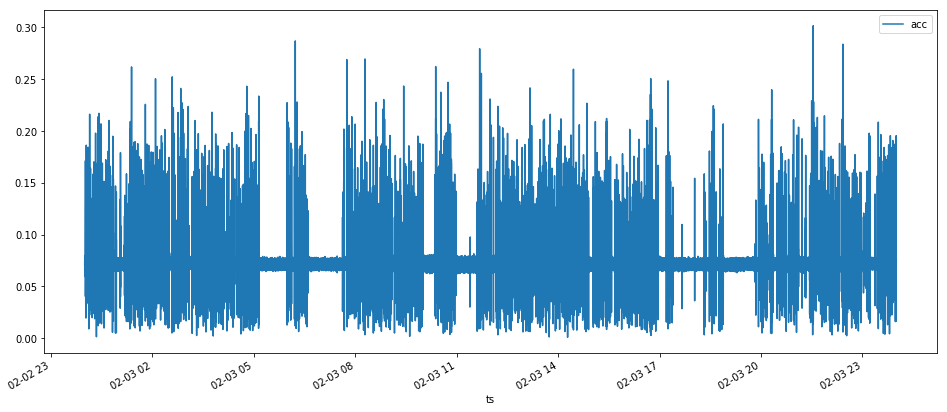

In [11]:
x.plot()

In [12]:
y=x.rolling(75*15).std()

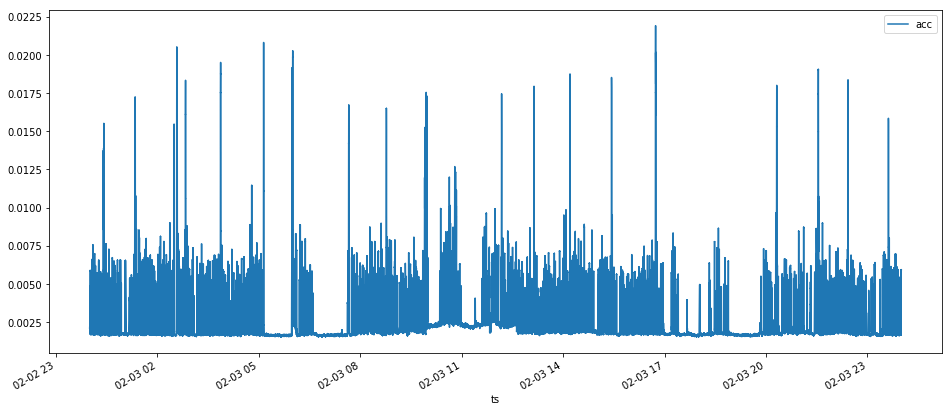

In [13]:
y.plot()

In [14]:
if ES_INDEX_DATE=="2018-02-02":
    thresholdVal=0.005
elif ES_INDEX_DATE=="2018-02-03":
    thresholdVal=0.003
else:
    thresholdVal=0.004
y["acc_thres"]=np.where(y['acc']>=thresholdVal, 1,0)

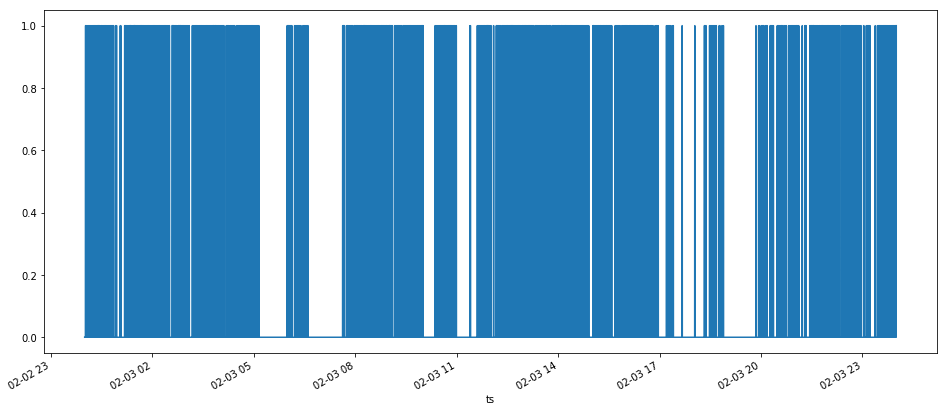

In [15]:
y.acc_thres.plot()

In [16]:
y["edges"]=y['acc_thres'] - y['acc_thres'].shift(1)

In [17]:
y["pedges"]=np.where(y["edges"]>0,1,0)

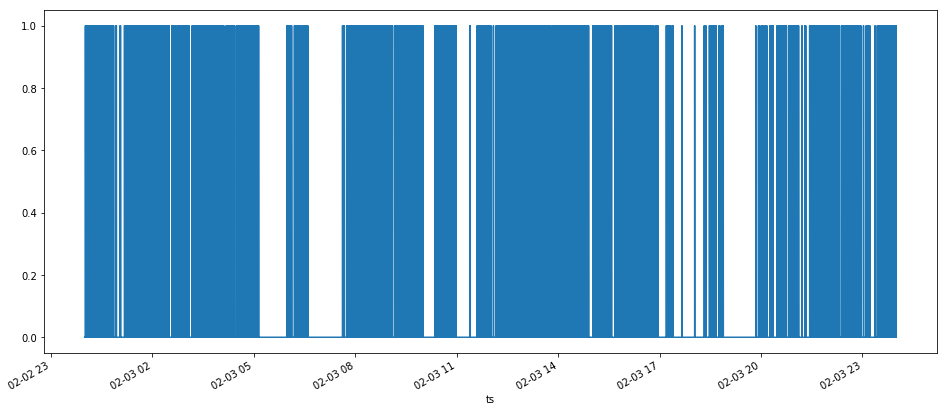

In [18]:
y.pedges.plot()

In [19]:
#y.loc['2018-02-01 16:00:00':'2018-02-01 16:59:59']

In [20]:
dformat= ES_INDEX_DATE + " %s:%s"
npcb=[]
for hr in range(0,24):
    start=dformat%(hr,"00:00")
    end=dformat%(hr,"59:59")
    z=y.loc[start:end]
    zz=z.pedges.sum()
    npcb.append(zz)
    print [hr,zz],
    
print "\n\nTOTAL--->",sum(npcb)
disection=y.pedges.loc[dformat%("00","00:00"):dformat%("23","59:59")]
print disection.sum()

[0, 37] [1, 43] [2, 38] [3, 39] [4, 36] [5, 7] [6, 24] [7, 22] [8, 42] [9, 43] [10, 29] [11, 22] [12, 38] [13, 42] [14, 36] [15, 37] [16, 38] [17, 9] [18, 17] [19, 3] [20, 34] [21, 37] [22, 38] [23, 32] 

TOTAL---> 743
743


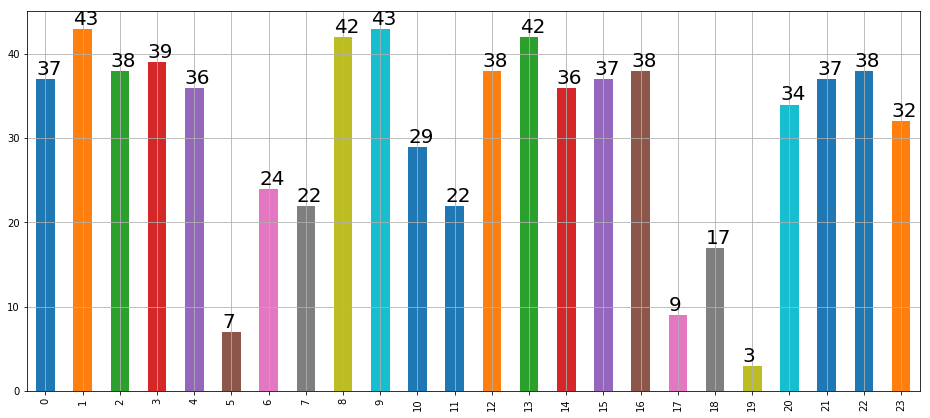

In [21]:
ax=pd.Series(npcb).plot.bar(grid=True)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    if i.get_height():
      ax.text(i.get_x(), i.get_height()+0.5, i.get_height() ,fontsize=20,color='black')

In [22]:
_hour=0
_startmins = "00:00"
_endmins = "59:59"

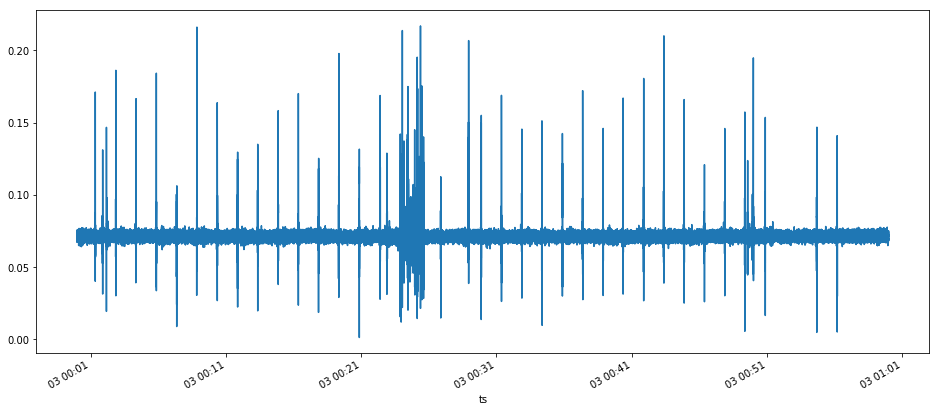

In [23]:
x.loc[dformat%(_hour,_startmins):dformat%(_hour,_endmins)].acc.plot()

In [24]:
with open("ldrRaw",'w') as f:
    f.write(x.loc[dformat%(_hour,_startmins):dformat%(_hour,_endmins)].acc.to_csv())

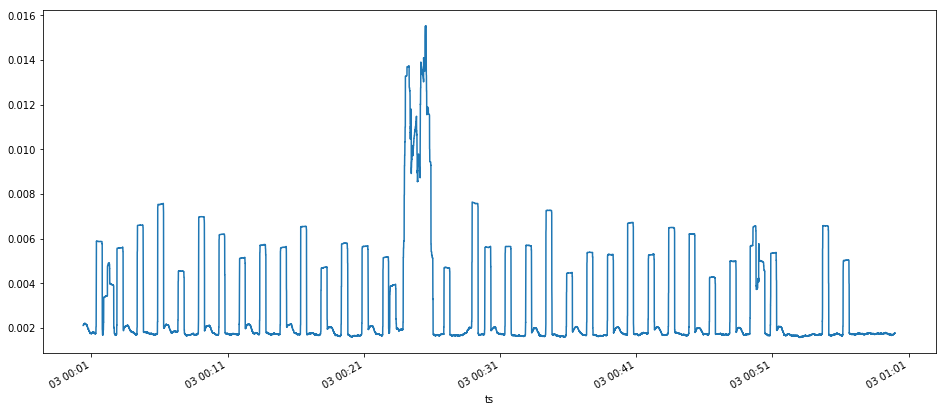

In [25]:
y.acc.loc[dformat%(_hour,_startmins):dformat%(_hour,_endmins)].plot()

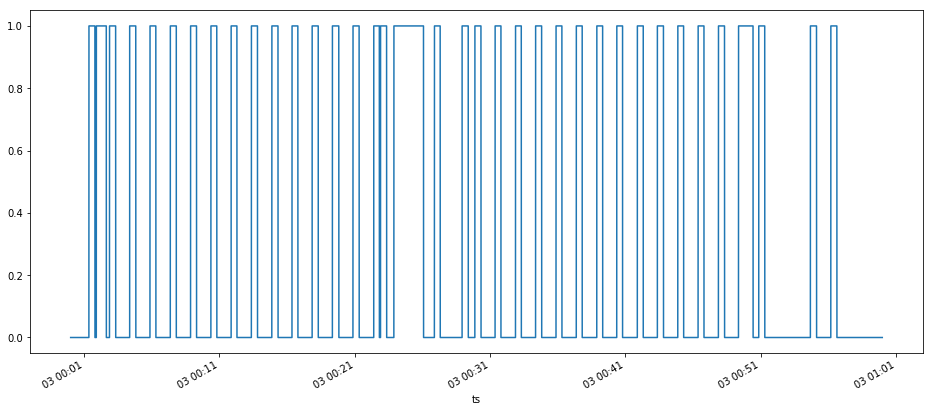

In [26]:
y.acc_thres.loc[dformat%(_hour,_startmins):dformat%(_hour,_endmins)].plot()

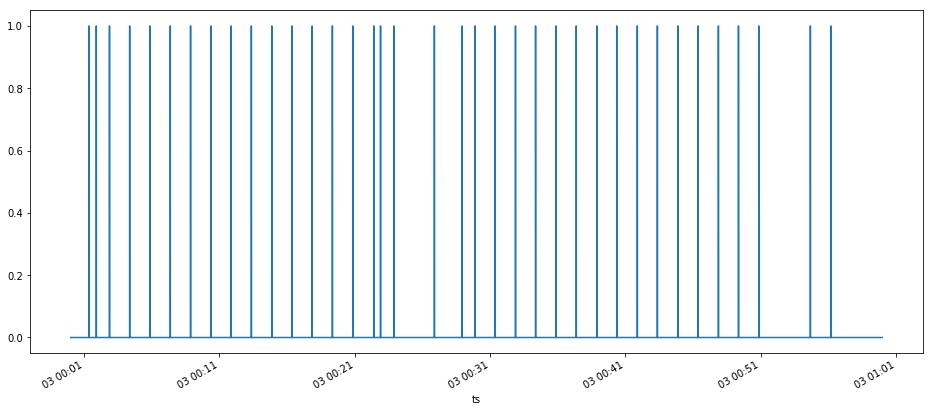

In [27]:
y.pedges.loc[dformat%(_hour,_startmins):dformat%(_hour,_endmins)].plot()

In [28]:
#Time PER PCB

In [29]:
pcbTime = y.loc[y.pedges==1]

In [30]:
pcbTime["timestamp"]=pcbTime.index

/home/sampad/Desktop/RBCCPS/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
pcbTime.timestamp.diff().mean()

Timedelta('0 days 00:01:56.320423')

In [32]:
pcbTime.timestamp.diff().std()

Timedelta('0 days 00:03:59.307854')